In [10]:
# import libraries needed
import pandas as pd
import numpy as np
import random

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [6]:
# import data
train = pd.read_csv('../processed_data/nr_ahr_std_train.csv')
#train.head()

train_data = train.std_compounds
train_labels = train.label

print('Train data shape:', train_data.shape)
print('Train labels shape:', train_labels.shape)

active_train = train_data[train_labels == 1].reset_index(drop=True)
inactive_train = train_data[train_labels == 0].reset_index(drop=True)

print('Active compounds:', len(train_labels[train_labels == 1]))
print('Inactive compounds:', len(train_labels[train_labels == 0]))
print('Inactive : Active =', len(train_labels[train_labels == 0]) // len(train_labels[train_labels == 1]))

Train data shape: (6709,)
Train labels shape: (6709,)
Active compounds: 761
Inactive compounds: 5948
Inactive : Active = 7


### How to visualize molecules using RDKit Draw

Link to documentation: https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html

Link to advanced examples: [RDKit Cookboook](http://www.rdkit.org/docs/Cookbook.html#using-scikit-learn-with-rdkit)

**Key**: Need to convert SMILES to an RDKit Mol object first using `Chem.MolFromSmiles()`

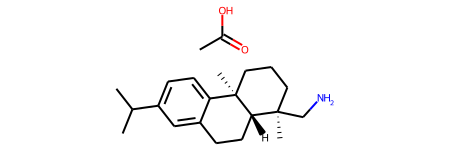

In [8]:
m = Chem.MolFromSmiles(train_data[0])
m

Display a grid of molecules using `Draw.MolsToGridImage()`.

For example, to display a random 5 examples of active compounds:

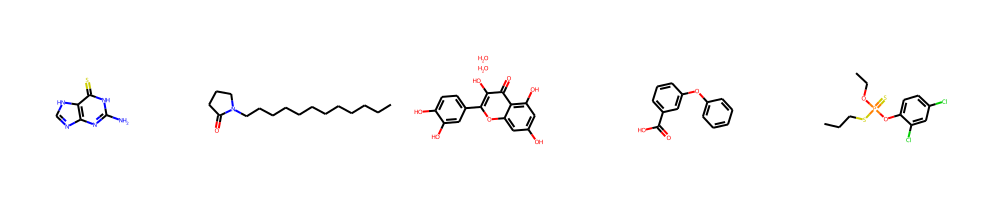

In [11]:
i_active = [random.randint(0, 761) for i in range(5)]
Draw.MolsToGridImage([Chem.MolFromSmiles(active_train[i]) for i in i_active], molsPerRow=5)

Highlight substructures using `GetSubstructureMatches()` if the substructure is a valid fragment.  Remember to convert *both* the molecule and the substructure to an RDKit Mol object first!

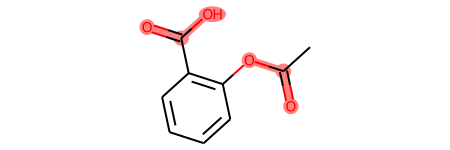

In [14]:
m2 = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
m2.GetSubstructMatches(substructure)
m2